In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cPickle as pickle
import numpy as np

%matplotlib inline

In [3]:
hist = {}
nevents = {}

In [4]:
picklefile=open('/data/user/hpandya/gamma_combined_scripts/resources/12533_L3_burnsample_2012_8Months.pickle','r')
hist['proton'] = pickle.load(picklefile)
nevents['proton'] = pickle.load(picklefile)

hist['gamma'] = pickle.load(picklefile)
nevents['gamma'] = pickle.load(picklefile)

xedges = pickle.load(picklefile)
yedges = pickle.load(picklefile)
picklefile.close()

In [37]:
xedges.keys()

['t_r', 'q_t', 'q_r']

NameError: name 'zoomed_inset_axes' is not defined

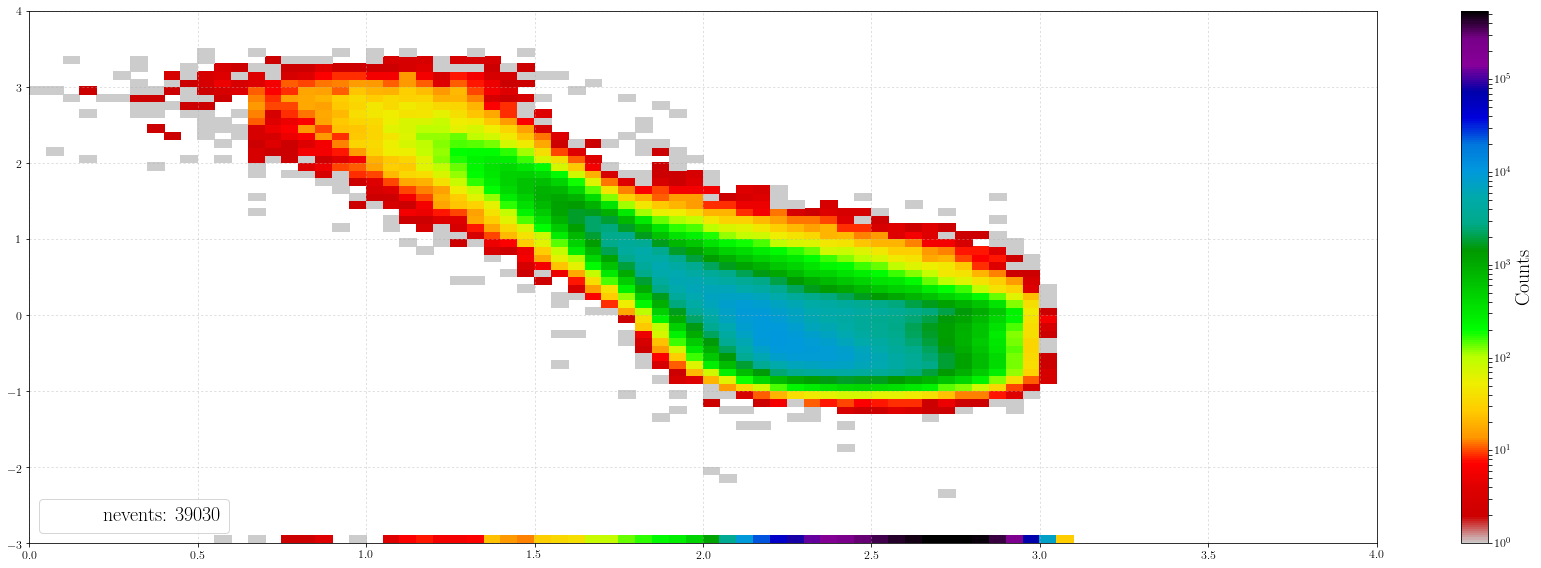

In [76]:
s125='0.2'
zen='0.9'
template='q_r'
cmap='spectral_r'

fig= plt.figure(figsize=(24,8))
vmin=0
for prim in ['proton']:
    temp=copy.deepcopy(hist[prim][template][s125][zen]).T
    
    temp=np.ma.masked_where(temp==0,temp)
    label='nevents: %i'%nevents[prim][template][s125][zen]

    if prim=='proton':
        vmin=temp.min()
        vmax=temp.max()

#     plt.pcolormesh(xedges[template],yedges[template],temp,cmap=cmap)
    plt.pcolormesh(xedges[template],yedges[template],temp,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmap)
    cbar=plt.colorbar()
    cbar.set_label('Counts',fontsize=20)
    plt.scatter([0.0],[2.0],color=None,s=0,label=label)
#     plt.title(hist_title[prim] + '   logs125:%s,  coszen:%s '%(s125,zen),fontsize=22)
#     plt.xlabel(xlabel[template], fontsize=27)
#     plt.ylabel(ylabel[template],fontsize=27)
    plt.legend(fontsize=20,loc=3)
#     plt.xlim(xlim[template])
#     plt.ylim(ylim[template])
    plt.grid(alpha=0.5)

    # show zoomed-in inset
    if template=='q_r':
        ax = plt.gca()
        axins = zoomed_inset_axes(ax, 2, loc=1)
#         axins.pcolormesh(xedges[template],yedges[template],temp,cmap=cmap)
        axins.pcolormesh(xedges[template],yedges[template],temp,norm=LogNorm(),cmap=cmap)
        axins.set_xlim(2.1, 3.0)
        axins.set_ylim(-0.2, 0.4)
        plt.xticks(visible=False)
        plt.yticks(visible=False)
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", lw=2)

In [44]:
hist['proton']['q_r']['0.2']['0.9'].shape

(80, 70)

In [79]:
xedges['q_r'].shape

(81,)

In [80]:
hist['proton']['q_r']['0.2']['0.9'].shape

(80, 70)

/home/jbourbeau/.local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


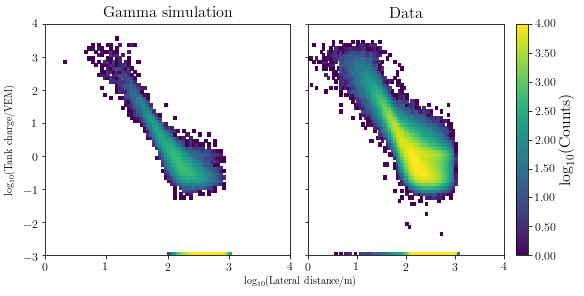

In [39]:
fig, axarr = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
# comp = 'proton'
comp = 'gamma'
for comp, ax in zip(['gamma', 'proton'], axarr.flat):
    h = hist[comp]['q_r']['0.2']['0.9']
    h = np.rot90(h)
    h = np.flipud(h)
    h = np.ma.masked_where(h==0,h)
    h = np.log10(h)
    im = ax.pcolormesh(xedges['q_r'], yedges['q_r'], h, vmax=4)
#     ax.set_xlabel('$\\log_{10}$(Lateral distance/m)')
#     ax.set_ylabel('$\\log_{10}$(Tank charge/VEM)')
    ax.set_title('Gamma simulation' if comp == 'gamma' else 'Data')
# Set common labels
fig.text(0.5, 0.0, '$\\log_{10}$(Lateral distance/m)', ha='center', va='center')
fig.text(0.0, 0.5, '$\\log_{10}$(Tank charge/VEM)', ha='center', va='center', rotation='vertical')
plt.colorbar(im, label='$\\log_{10}$(Counts)', format='$%.2f$')
plt.savefig('/home/jbourbeau/public_html/figures/LDF.png')
plt.show()

/home/jbourbeau/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


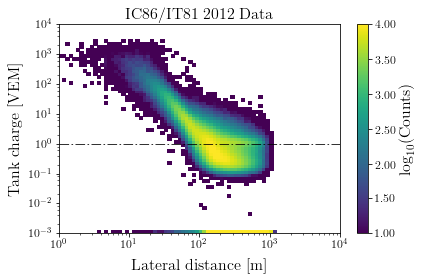

In [7]:
fig, ax = plt.subplots()
comp = 'proton'
# comp = 'gamma'
h = hist[comp]['q_r']['0.2']['0.9']
# h[100:-50] = 0
h = np.rot90(h)
h = np.flipud(h)
h = np.ma.masked_where(h==0,h)
h = np.log10(h)
im = ax.pcolormesh(10**xedges['q_r'], 10**yedges['q_r'], h, vmin=1, vmax=4)
# im = ax.pcolormesh(10**xedges['q_r'], 10**yedges['q_r'], h, vmin=1, vmax=2.75)
ax.axhline(1.0, marker='None', ls='-.', color='k')
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
# ax.set_xlabel('$\\log_{10}$(Lateral distance/m)')
# ax.set_ylabel('$\\log_{10}$(Tank charge/VEM)')
ax.set_xlabel('Lateral distance [m]')
ax.set_ylabel('Tank charge [VEM]')
ax.set_title('Gamma simulation' if comp == 'gamma' else 'IC86/IT81 2012 Data')
plt.colorbar(im, label='$\\log_{10}$(Counts)', format='$%.2f$')
plt.savefig('/home/jbourbeau/public_html/figures/LDF-{}.png'.format(comp))
plt.show()

In [13]:
h[:,-1] = np.ma.masked